**Load dataset**



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
file_path = "/content/drive/MyDrive/Codveda DA/iris_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


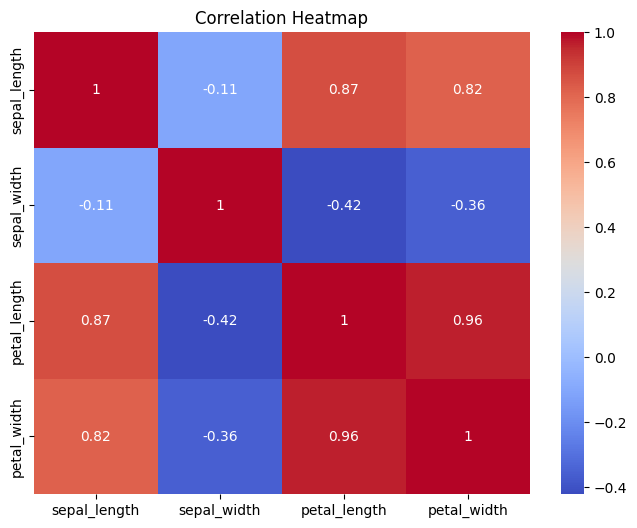

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# correlation between sepal length and petal length is 0.87
# which is suitable for fitur and target

**Split the dataset into training and testing sets**

In [7]:
#Regression analysis
X = df[['sepal_length']]
y = df['petal_length']
# split dataset into training(80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inisiation and train model linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# predict result
y_pred = model.predict(X_test)
#evaluation model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Koefisien : {model.coef_[0]}")
print(f"Intercept : {model.intercept_}")
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")
# the effect sepal length to petal length : 1.885
#intercept : starting point of regression model -7.30
#mean error between prediction and data real is 0.8
#r squared 0.7

# because mse too high result so we using ridge regression

Koefisien : 1.885871739325272
Intercept : -7.309697918283384
Mean Squared Error : 0.8537728452189909
R-squared : 0.7083101857817128


**Fit a linear regression model using scikit-learn**

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

ridge_pred = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f"Best alpha : {best_alpha}")
print(f"Optimized Ridge MSE: {ridge_mse}")

y_pred_ridge =best_ridge.predict(X_test)

Best alpha : 1
Optimized Ridge MSE: 0.847665193703687


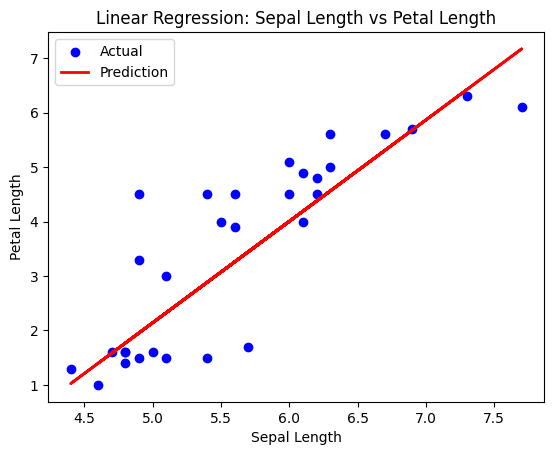

In [9]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label='Prediction')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Linear Regression: Sepal Length vs Petal Length")
plt.legend()
plt.show()

**Analyze a time-series dataset (e.g., stock
prices, temperature data) to detect trends and
seasonality**

In [10]:
df_time = pd.read_csv("/content/drive/MyDrive/Codveda DA/2) Stock Prices Data Set.csv")
df_time.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [11]:
df_time.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


**Plot time-series data and identify patterns**

In [12]:
df_time['open'].fillna(df_time['open'].mean(), inplace=True)
df_time['high'].fillna(df_time['high'].mean(), inplace=True)
df_time['low'].fillna(df_time['low'].mean(), inplace=True)

<ipython-input-12-2a095e6e247e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_time['open'].fillna(df_time['open'].mean(), inplace=True)
<ipython-input-12-2a095e6e247e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [13]:
df_time['date'] = pd.to_datetime(df_time['date'])

In [14]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497472 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [15]:
df_time.drop_duplicates(inplace=True)

In [16]:
#standarization of symbol
df_time['symbol'] = df_time['symbol'].str.upper().str.strip()

In [17]:
df_time.set_index('date', inplace=True)

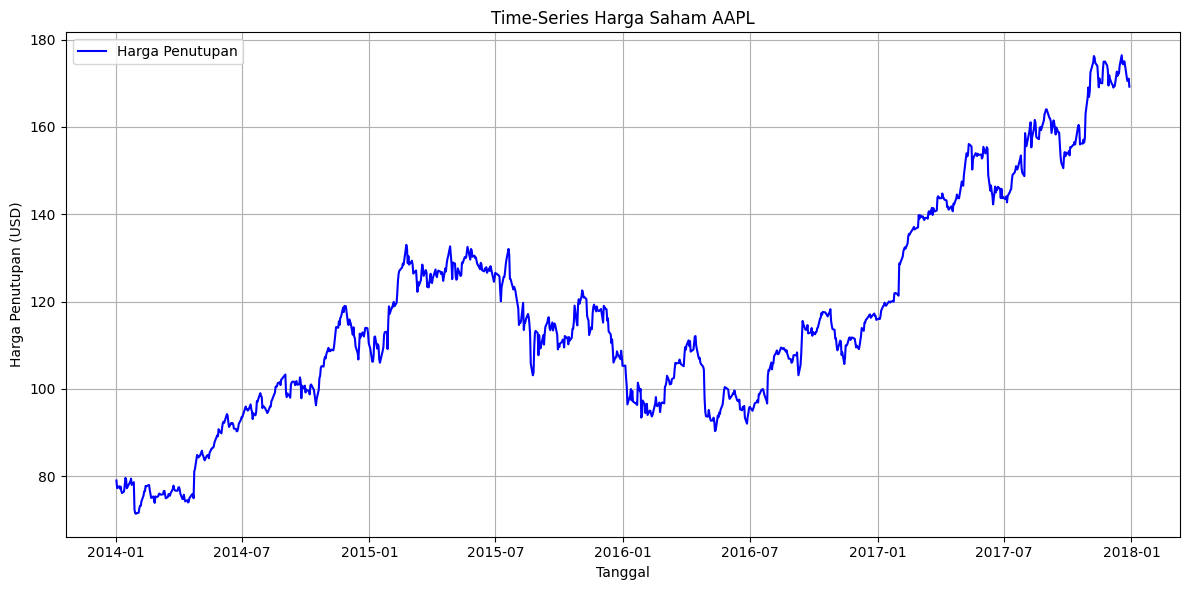

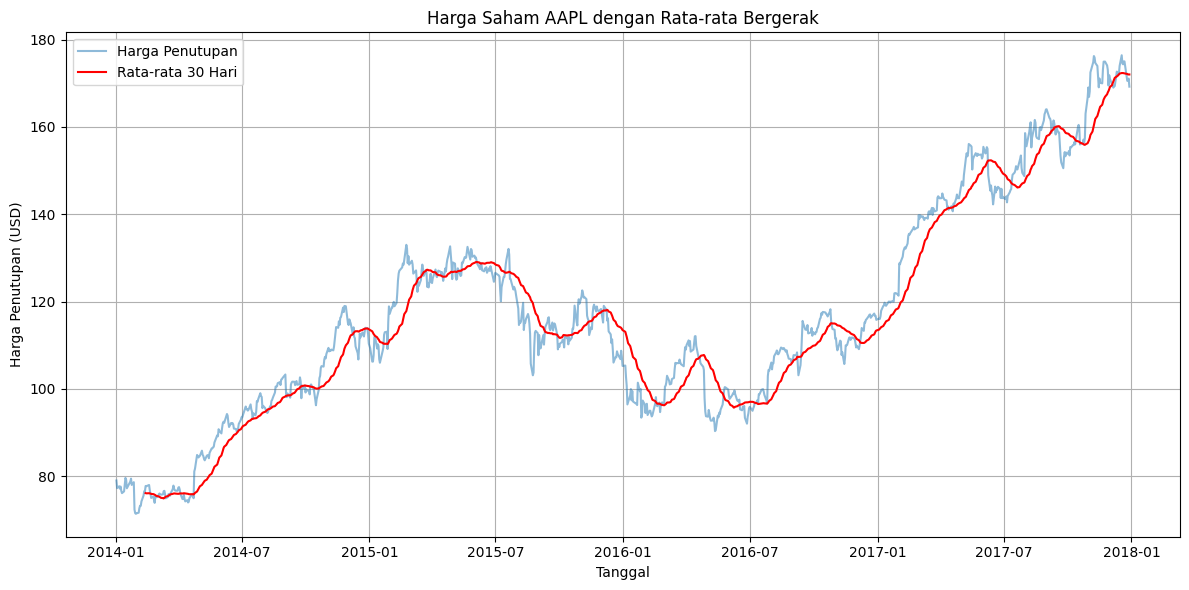

In [18]:

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Codveda DA/2) Stock Prices Data Set.csv")

# Konversi tanggal dan sortir
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Filter data untuk satu saham, misal: AAPL
aapl_df = df[df['symbol'] == 'AAPL']
aapl_df.set_index('date', inplace=True)

# Plot time-series harga penutupan
plt.figure(figsize=(12, 6))
plt.plot(aapl_df['close'], label='Harga Penutupan', color='blue')
plt.title("Time-Series Harga Saham AAPL")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Moving average (opsional, untuk lihat tren jangka panjang)
plt.figure(figsize=(12, 6))
plt.plot(aapl_df['close'], label='Harga Penutupan', alpha=0.5)
plt.plot(aapl_df['close'].rolling(window=30).mean(), label='Rata-rata 30 Hari', color='red')
plt.title("Harga Saham AAPL dengan Rata-rata Bergerak")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Decompose the series into trend, seasonality, and
residuals using statsmodels**

<ipython-input-19-d81726574822>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aapl_monthly = aapl_df['close'].resample('M').mean()


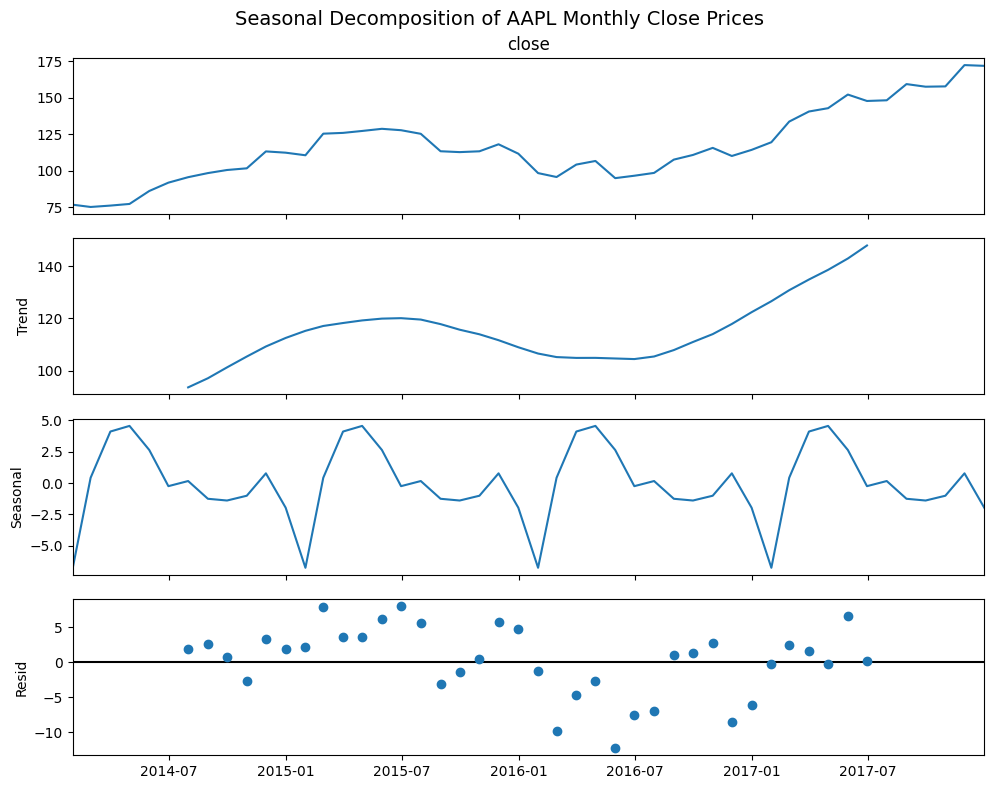

In [19]:
#Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

# Update the file path to the correct location
# If the file is in the same directory as the notebook, you can use:
# stock_path = "/content/drive/MyDrive/Codveda DA/2) Stock Prices Data Set.csv"
stock_path = "/content/drive/MyDrive/Codveda DA/2) Stock Prices Data Set.csv"  # Assuming the same path as before
stock_df = pd.read_csv(stock_path)

# Convert date column to datetime and sort by date
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df = stock_df.sort_values(by='date')

# Filter one stock symbol for decomposition, for example 'AAPL'
aapl_df = stock_df[stock_df['symbol'] == 'AAPL']

# Set date as index
aapl_df.set_index('date', inplace=True)

# Resample daily data to monthly average for decomposition (to reduce noise)
aapl_monthly = aapl_df['close'].resample('M').mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(aapl_monthly, model='additive')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Seasonal Decomposition of AAPL Monthly Close Prices', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Perform moving average smoothing and plot the results**

<ipython-input-20-964561179a1b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['MA_7'] = aapl_df['close'].rolling(window=7).mean()     # Rata-rata 7 hari
<ipython-input-20-964561179a1b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['MA_30'] = aapl_df['close'].rolling(window=30).mean()   # Rata-rata 30 hari


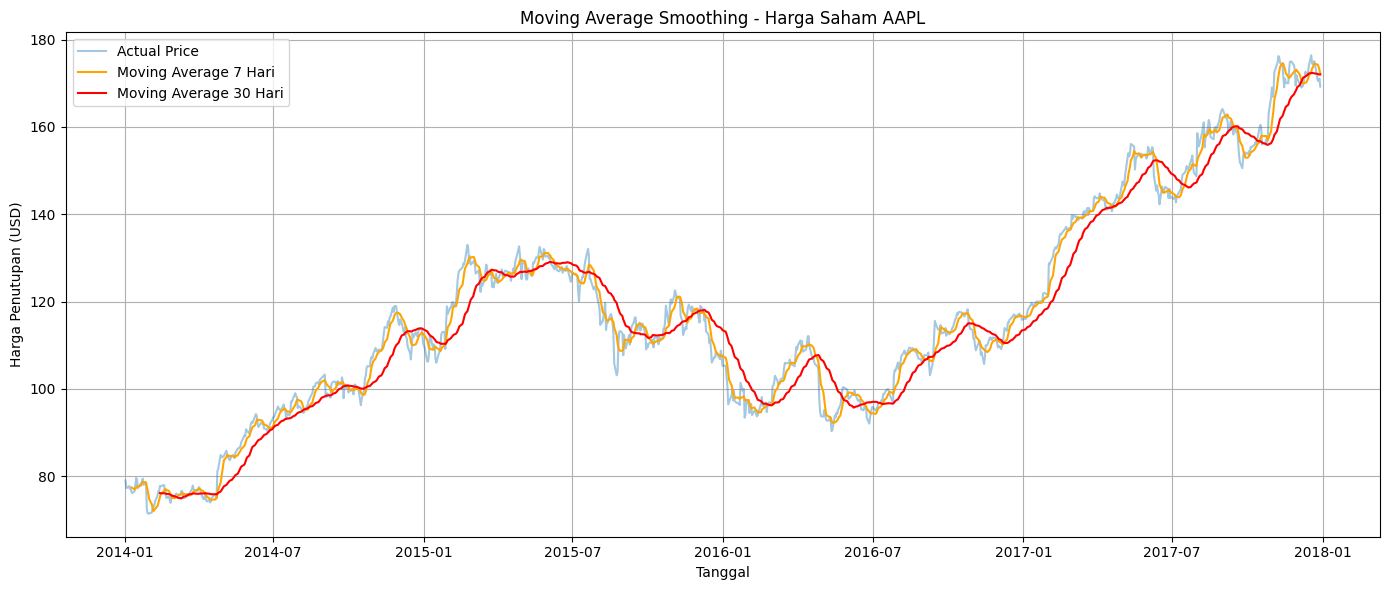

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Codveda DA/2) Stock Prices Data Set.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Filter saham AAPL
aapl_df = df[df['symbol'] == 'AAPL']
aapl_df.set_index('date', inplace=True)

# Hitung moving averages
aapl_df['MA_7'] = aapl_df['close'].rolling(window=7).mean()     # Rata-rata 7 hari
aapl_df['MA_30'] = aapl_df['close'].rolling(window=30).mean()   # Rata-rata 30 hari

# Plot
plt.figure(figsize=(14, 6))
plt.plot(aapl_df['close'], label='Actual Price', alpha=0.4)
plt.plot(aapl_df['MA_7'], label='Moving Average 7 Hari', color='orange')
plt.plot(aapl_df['MA_30'], label='Moving Average 30 Hari', color='red')
plt.title("Moving Average Smoothing - Harga Saham AAPL")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Standardize the dataset (e.g., using StandardScaler)**

In [21]:
# Load the iris dataset again if you need it for clustering
df_iris = pd.read_csv("/content/drive/MyDrive/Codveda DA/iris_cleaned.csv")

#choosing fitur petal and sepal for clustering
df_cluster = df_iris[['sepal_length', 'petal_length']] # Use df_iris instead of df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [30]:
df_time.drop_duplicates(inplace=True)

In [35]:
#standarization of symbol
df_time['symbol'] = df_time['symbol'].str.upper().str.strip()

In [34]:
# Check if 'date' is in the columns
if 'date' in df_time.columns:
    df_time.set_index('date', inplace=True)
else:
    print("The 'date' column is not present in the DataFrame. It might have already been set as the index or removed.")
    # If you need to reset the index, you can use:
    # df_time = df_time.reset_index()
    # df_time.set_index('date', inplace=True)

The 'date' column is not present in the DataFrame. It might have already been set as the index or removed.


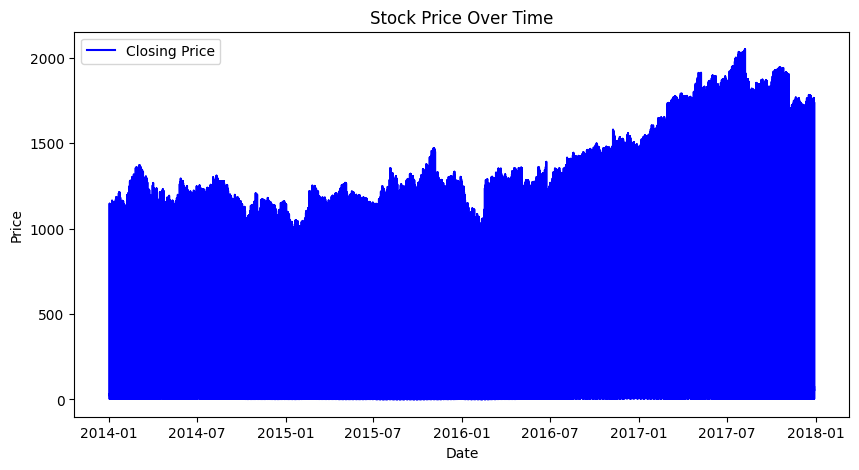

In [36]:
#plot time series data
plt.figure(figsize=(10,5))
plt.plot(df_time.index, df_time['close'], label='Closing Price', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

<ipython-input-39-76f9878e1e85>:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_time = df_time.interpolate(method='linear')
<ipython-input-39-76f9878e1e85>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time['close'] = df_time['close'].fillna(method='ffill')  # Forward fill


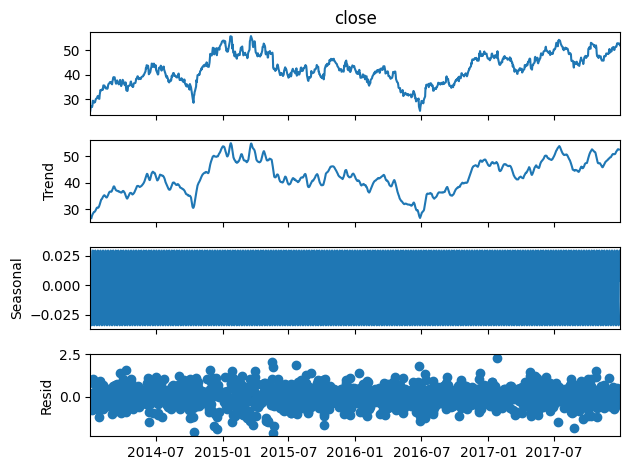

In [39]:
#Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
df_time = df_time[~df_time.index.duplicated(keep='first')]
# Interpolate to fill missing values before resampling
df_time = df_time.interpolate(method='linear')
# Resample to daily frequency
df_time = df_time.asfreq('D')
# Fill any remaining missing values after resampling (important!)
df_time['close'] = df_time['close'].fillna(method='ffill')  # Forward fill
# Perform seasonal decomposition
decomposition = seasonal_decompose(df_time['close'], model='additive')
decomposition.plot()
plt.show()

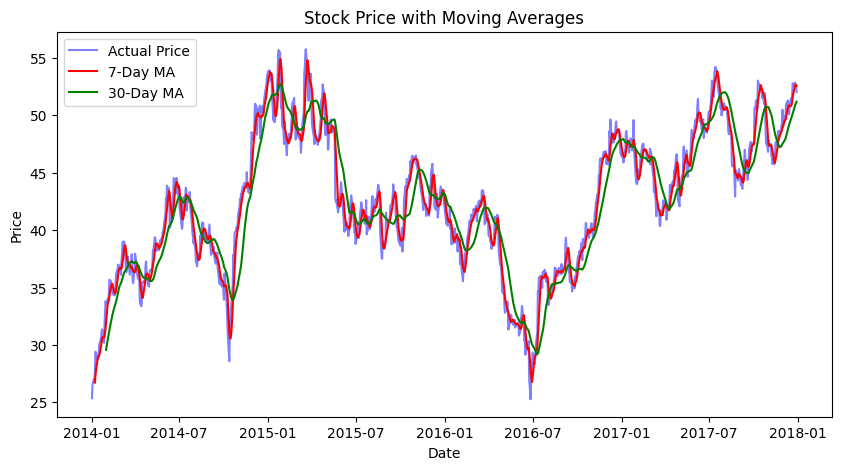

In [41]:
df_time['SMA_7'] = df_time['close'].rolling(window=7).mean()  # 7 days
df_time['SMA_30'] = df_time['close'].rolling(window=30).mean() # 30 days

plt.figure(figsize=(10,5))
plt.plot(df_time['close'], label='Actual Price', color='blue', alpha=0.5)
plt.plot(df_time['SMA_7'], label='7-Day MA', color='red')
plt.plot(df_time['SMA_30'], label='30-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

In [45]:
#choosing fitur petal and sepal for clustering
df_cluster = df_iris[['sepal_length', 'petal_length']] # Use df_iris instead of df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

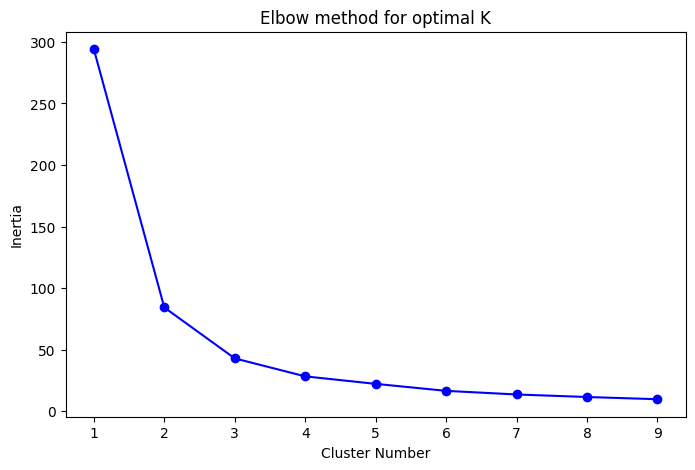

In [43]:
#test for range cluster 1-10 with elbow method
inertia = []
K = range(1,10)
for k in K :
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K,inertia, 'bo-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.show()
# k = 3 because the graphic results finds that it suitable clustering
# we use cluster 3

In [46]:
cluster_result = 3
kmeans = KMeans(n_clusters=cluster_result, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

<ipython-input-46-6d2d866e20ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)


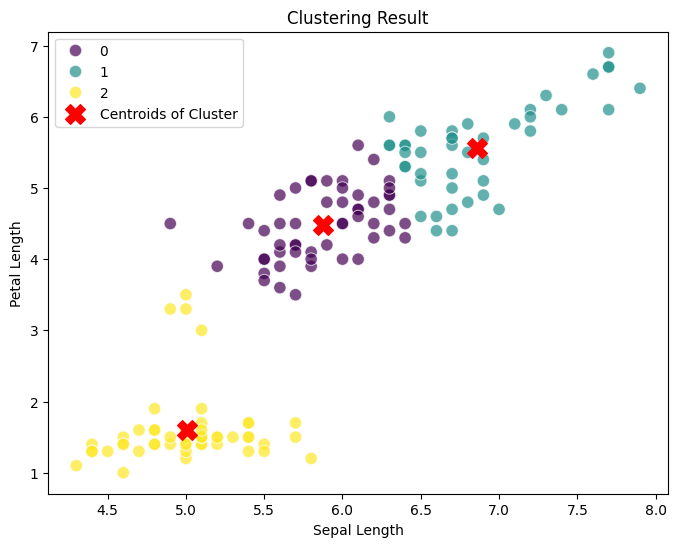

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cluster['sepal_length'], y=df_cluster['petal_length'], hue=df_cluster['Cluster'], palette= 'viridis', s=80, alpha=0.7)

#plot center cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0],centroids[:,1], marker='X', s=200,color='red', label='Centroids of Cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clustering Result')
plt.legend()
plt.show()
# cluster 0 have centroids for petal length 4,5  with range data (3-5)
# cluster 1 >5,5
# cluster 2 1,5

In [50]:
df.to_csv("/content/drive/MyDrive/Codveda DA/level2_cleaned.csv", index=False) # Changed file path to include file name
print("File saved: level2_cleaned.csv")

File saved: level2_cleaned.csv


In [53]:
df_time.to_csv("/content/drive/MyDrive/Codveda DA/level2timeseries_cleaned.csv", index=False)
print("File saved: level2timeseries_cleaned.csv")
df_cluster.to_csv("/content/drive/MyDrive/Codveda DA/level2cluster_cleaned.csv", index=False)
print("File saved: level2cluster_cleaned.csv")

File saved: level2timeseries_cleaned.csv
File saved: level2cluster_cleaned.csv


In [55]:
# Menyimpan hasil prediksi dan data aktual ke dalam DataFrame
results_regression = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Menyimpan ke file CSV
results_regression.to_csv("/content/drive/MyDrive/Codveda DA/regression_results.csv", index=False)

print("Regression results saved as regression_results.csv")

# Menyimpan koefisien dan metrik evaluasi ke dalam DataFrame
model_summary= pd.DataFrame({
    'Coefficient': [model.coef_[0]],
    'Intercept': [model.intercept_],
    'Mean Squared Error': [mse],
    'R-squared': [r2]
})

# Menyimpan model summary ke dalam file CSV
model_summary.to_csv("/content/drive/MyDrive/Codveda DA/model_summary.csv", index=False)

print("Model summary saved as model_summary.csv")

Regression results saved as regression_results.csv
Model summary saved as model_summary.csv


In [57]:
df_time.head()

,symbol,open,high,low,close,volume,SMA_7,SMA_30
date,,,,,,,,
2014-01-02,AAL,25.07,25.82,25.060000,25.360000,8.998943e+06,NaN,NaN
2014-01-03,AAL,25.75,26.75,25.510000,26.540000,1.383606e+07,NaN,NaN
2014-01-04,NaN,26.04,26.90,25.873333,26.703333,1.298147e+07,NaN,NaN
2014-01-05,NaN,26.33,27.05,26.236667,26.866667,1.212687e+07,NaN,NaN
2014-01-06,AAL,26.62,27.20,26.600000,27.030000,1.127227e+07,NaN,NaN
